# DATA PREPROCESSING

In [196]:
import os
import pandas as pd
import numpy as np


def normalize_dataframe(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)

        max_allowed_value = 1e10  
        df[column] = np.clip(df[column], -max_allowed_value, max_allowed_value)
        
        mean = df[column].mean()
        std = df[column].std()
        
        df[column] = (df[column] - mean) / std


def normalize_csv(input_csv_path):
    df = pd.read_csv(input_csv_path)
    normalize_dataframe(df)
    df.to_csv(input_csv_path, index=False) 


folder1_path = 'D:/Sem5/ML LAB TEST/CSV/ADHD'
folder2_path = 'D:/Sem5/ML LAB TEST/CSV/Control part'


for folder_path in [folder1_path, folder2_path]:
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            input_csv_path = os.path.join(folder_path, filename)
            normalize_csv(input_csv_path)


Data within CSV files has been normalized while handling NaN, infinity, and large values.


In [197]:
import os
import pandas as pd


def find_min_rows_in_folder(folder_path):
    min_rows = float('inf')
    min_csv_file = None

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            num_rows = len(df)
            if num_rows < min_rows:
                min_rows = num_rows
                min_csv_file = file_path

    return min_csv_file, min_rows


def normalize_csv(input_csv_path, target_num_rows):
    df = pd.read_csv(input_csv_path)
    df = df.iloc[:, 1:]
    normalized_df = df.sample(target_num_rows, replace=True)
    normalized_df.to_csv(input_csv_path, index=False) 

folder1_path = 'D:/Sem5/ML LAB TEST/CSV/ADHD'
folder2_path = 'D:/Sem5/ML LAB TEST/CSV/Control part'


min_csv_file1, min_rows1 = find_min_rows_in_folder(folder1_path)
min_csv_file2, min_rows2 = find_min_rows_in_folder(folder2_path)


if min_rows1 < min_rows2:
    min_csv_file = min_csv_file1
    min_rows = min_rows1
else:
    min_csv_file = min_csv_file2
    min_rows = min_rows2


for folder_path in [folder1_path, folder2_path]:
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            input_csv_path = os.path.join(folder_path, filename)
            normalize_csv(input_csv_path, min_rows)

print(f"Min number of rows {min_rows}")


Minimum number of rows found: 7983
CSV file with minimum rows: D:/Sem5/ML LAB TEST/CSV/Control part\v51p.csv
Normalized CSV files have been saved in the same CSV files, overwriting the originals.


In [282]:
import os
import pandas as pd

folder_path = 'D:/Sem5/ML LAB TEST/CSV'

csv_shapes = {}


for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        csv_shapes[filename] = df.shape
        
for filename, shape in csv_shapes.items():
    print(f'{filename}: {shape}')

v107.csv: (7983, 20)
v108.csv: (7983, 20)
v109.csv: (7983, 20)
v110.csv: (7983, 20)
v111.csv: (7983, 20)
v112.csv: (7983, 20)
v113.csv: (7983, 20)
v114.csv: (7983, 20)
v115.csv: (7983, 20)
v116.csv: (7983, 20)
v117.csv: (7983, 20)
v118.csv: (7983, 20)
v120.csv: (7983, 20)
v121.csv: (7983, 20)
v123.csv: (7983, 20)
v125.csv: (7983, 20)
v127.csv: (7983, 20)
v129.csv: (7983, 20)
v131.csv: (7983, 20)
v133.csv: (7983, 20)
v134.csv: (7983, 20)
v138.csv: (7983, 20)
v140.csv: (7983, 20)
v143.csv: (7983, 20)
v147.csv: (7983, 20)
v149.csv: (7983, 20)
v151.csv: (7983, 20)
v297.csv: (7983, 20)
v298.csv: (7983, 20)
v299.csv: (7983, 20)
v300.csv: (7983, 20)
v302.csv: (7983, 20)
v303.csv: (7983, 20)
v304.csv: (7983, 20)
v305.csv: (7983, 20)
v306.csv: (7983, 20)
v307.csv: (7983, 20)
v308.csv: (7983, 20)
v309.csv: (7983, 20)
v310.csv: (7983, 20)
v41p.csv: (7983, 20)
v42p.csv: (7983, 20)
v43p.csv: (7983, 20)
v44p.csv: (7983, 20)
v45p.csv: (7983, 20)
v46p.csv: (7983, 20)
v47p.csv: (7983, 20)
v48p.csv: (79

# NON-LINEAR CORRELATION CO-EFFICIENT

In [165]:
from scipy.stats import spearmanr, kendalltau

In [199]:
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau


def calculate_nonlinear_correlations(input_csv_path):
    df = pd.read_csv(input_csv_path)
    features = df.columns[:19]
    df_subset = df[features]
    
    spearman_corr = df_subset.corr(method='spearman')
    kendall_corr = df_subset.corr(method='kendall')
    return spearman_corr, kendall_corr


def calculate_nonlinear_correlations_in_folder(folder_path, min_rows):
    spearman_correlations = {}
    kendall_correlations = {}
    all_spearman_matrices = []  
    all_kendall_matrices = []   
    count_spearman = 0
    count_kendall = 0
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            input_csv_path = os.path.join(folder_path, filename)
            spearman_corr, kendall_corr = calculate_nonlinear_correlations(input_csv_path)
            
            all_spearman_matrices.append(spearman_corr)
            all_kendall_matrices.append(kendall_corr)
    
            spearman_correlations[filename] = spearman_corr
            kendall_correlations[filename] = kendall_corr
            
            count_spearman += 1
            count_kendall += 1

    return (
        spearman_correlations, kendall_correlations,
        all_spearman_matrices, all_kendall_matrices,
        count_spearman, count_kendall
    )

(spearman_correlations_folder1, kendall_correlations_folder1,
 all_spearman_matrices_folder1, all_kendall_matrices_folder1,
 count_spearman1, count_kendall1) = calculate_nonlinear_correlations_in_folder(folder1_path, min_rows)

(spearman_correlations_folder2, kendall_correlations_folder2,
 all_spearman_matrices_folder2, all_kendall_matrices_folder2,
 count_spearman2, count_kendall2) = calculate_nonlinear_correlations_in_folder(folder2_path, min_rows)

first_spearman_matrix_folder1 = all_spearman_matrices_folder1[0]
first_spearman_matrix_folder2 = all_spearman_matrices_folder2[0]

first_kendall_matrix_folder1 = all_kendall_matrices_folder1[0]
first_kendall_matrix_folder2 = all_kendall_matrices_folder2[0]


In [200]:
print("Spearman Correlations for CSV files in ADHD:")
for filename, spearman_corr in spearman_correlations_folder1.items():
    print(f"Spearman Correlation matrix for {filename}:")
    print(spearman_corr)

Spearman Correlations for CSV files in ADHD:
Spearman Correlation matrix for v10p.csv:
           0         1         2         3         4         5         6  \
0   1.000000  0.805900  0.770575  0.582282  0.596625  0.423306  0.510843   
1   0.805900  1.000000  0.649180  0.737217  0.502306  0.530902  0.380432   
2   0.770575  0.649180  1.000000  0.672050  0.801459  0.546173  0.635808   
3   0.582282  0.737217  0.672050  1.000000  0.568117  0.772097  0.386447   
4   0.596625  0.502306  0.801459  0.568117  1.000000  0.632501  0.803601   
5   0.423306  0.530902  0.546173  0.772097  0.632501  1.000000  0.470245   
6   0.510843  0.380432  0.635808  0.386447  0.803601  0.470245  1.000000   
7   0.349591  0.452751  0.495946  0.584411  0.632156  0.765927  0.608645   
8   0.010014 -0.162754  0.034144 -0.188172  0.129096 -0.085882  0.413058   
9   0.094798  0.166334  0.188314  0.254732  0.344070  0.439037  0.487281   
10  0.485998  0.487645  0.571802  0.499946  0.531376  0.453018  0.378126   
1

In [201]:
print("Kendall Correlations for CSV files in ADHD:")
for filename, kendall_corr in kendall_correlations_folder1.items():
    print(f"Kendall Correlation matrix for {filename}:")
    print(kendall_corr)


Kendall Correlations for CSV files in ADHD:
Kendall Correlation matrix for v10p.csv:
           0         1         2         3         4         5         6  \
0   1.000000  0.660166  0.610643  0.436432  0.446667  0.307609  0.373807   
1   0.660166  1.000000  0.498603  0.580211  0.372277  0.396287  0.276085   
2   0.610643  0.498603  1.000000  0.515825  0.646338  0.406409  0.478659   
3   0.436432  0.580211  0.515825  1.000000  0.423860  0.612609  0.278157   
4   0.446667  0.372277  0.646338  0.423860  1.000000  0.482577  0.644560   
5   0.307609  0.396287  0.406409  0.612609  0.482577  1.000000  0.343983   
6   0.373807  0.276085  0.478659  0.278157  0.644560  0.343983  1.000000   
7   0.250839  0.334755  0.363877  0.437770  0.478951  0.609934  0.458232   
8   0.007105 -0.118739  0.024830 -0.134049  0.092762 -0.060696  0.301723   
9   0.068518  0.122073  0.136496  0.186108  0.251315  0.326639  0.363960   
10  0.361561  0.369210  0.435452  0.374583  0.396620  0.335995  0.273589   
11 

In [202]:
print("Spearman Correlations for CSV files in control:")
for filename, spearman_corr in spearman_correlations_folder2.items():
    print(f"Spearman Correlation matrix for {filename}:")
    print(spearman_corr)

Spearman Correlations for CSV files in control:
Spearman Correlation matrix for v107.csv:
           0         1         2         3         4         5         6  \
0   1.000000  0.490643  0.618617  0.564146  0.496498  0.199132 -0.086889   
1   0.490643  1.000000  0.640696  0.480979  0.561390  0.544328  0.138441   
2   0.618617  0.640696  1.000000  0.486787  0.829544  0.559955  0.260288   
3   0.564146  0.480979  0.486787  1.000000  0.354218  0.432520 -0.098977   
4   0.496498  0.561390  0.829544  0.354218  1.000000  0.527279  0.385968   
5   0.199132  0.544328  0.559955  0.432520  0.527279  1.000000  0.403321   
6  -0.086889  0.138441  0.260288 -0.098977  0.385968  0.403321  1.000000   
7  -0.058384  0.015760  0.086885  0.085628  0.144716  0.432206  0.549555   
8  -0.021404  0.043573  0.156301 -0.122220  0.242028  0.180391  0.670950   
9  -0.195482  0.114039  0.111990 -0.170339  0.170449  0.272435  0.569473   
10  0.566441  0.639319  0.710061  0.249838  0.730613  0.410436  0.161375  

In [203]:
print("Kendall Correlations for CSV files in control:")
for filename, kendall_corr in kendall_correlations_folder2.items():
    print(f"Kendall Correlation matrix for {filename}:")
    print(kendall_corr)

Kendall Correlations for CSV files in control:
Kendall Correlation matrix for v107.csv:
           0         1         2         3         4         5         6  \
0   1.000000  0.372314  0.485163  0.439159  0.381905  0.148713 -0.068414   
1   0.372314  1.000000  0.504040  0.362496  0.437936  0.420415  0.104115   
2   0.485163  0.504040  1.000000  0.371184  0.700889  0.439301  0.199579   
3   0.439159  0.362496  0.371184  1.000000  0.265679  0.328561 -0.076450   
4   0.381905  0.437936  0.700889  0.265679  1.000000  0.408341  0.298256   
5   0.148713  0.420415  0.439301  0.328561  0.408341  1.000000  0.309196   
6  -0.068414  0.104115  0.199579 -0.076450  0.298256  0.309196  1.000000   
7  -0.046235  0.011393  0.065096  0.064073  0.108715  0.330498  0.425465   
8  -0.017170  0.033066  0.117618 -0.093083  0.182341  0.134826  0.525017   
9  -0.151602  0.084566  0.083074 -0.130822  0.126745  0.203332  0.436344   
10  0.438141  0.503422  0.571059  0.184784  0.591639  0.314168  0.122542   


In [204]:
print("Number of Spearman Correlation matrices in folder 1:", count_spearman1)
print("Number of Kendall Correlation matrices in folder 1:", count_kendall1)
print("Number of Spearman Correlation matrices in folder 2:", count_spearman2)
print("Number of Kendall Correlation matrices in folder 2:", count_kendall2)

Number of Spearman Correlation matrices in folder 1: 62
Number of Kendall Correlation matrices in folder 1: 62
Number of Spearman Correlation matrices in folder 2: 60
Number of Kendall Correlation matrices in folder 2: 60


# HEATMAP

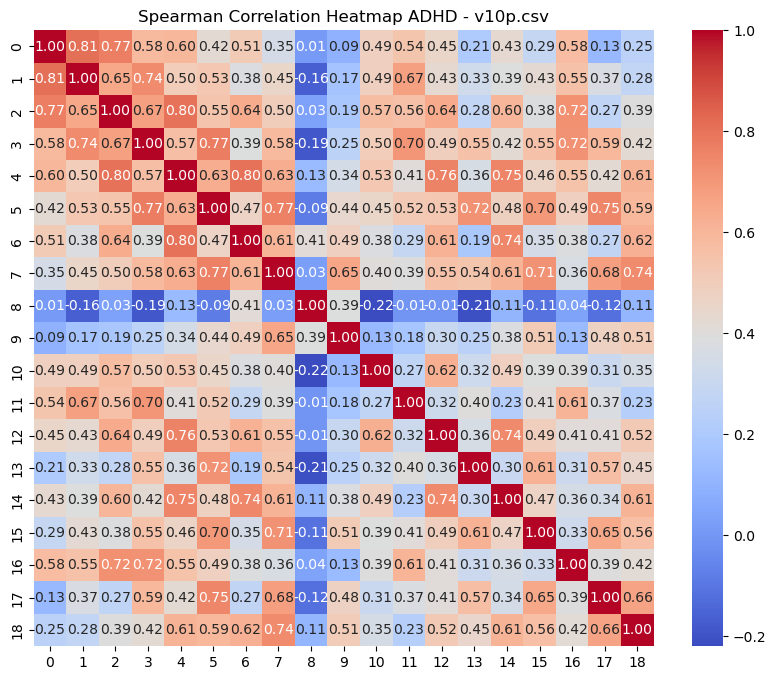

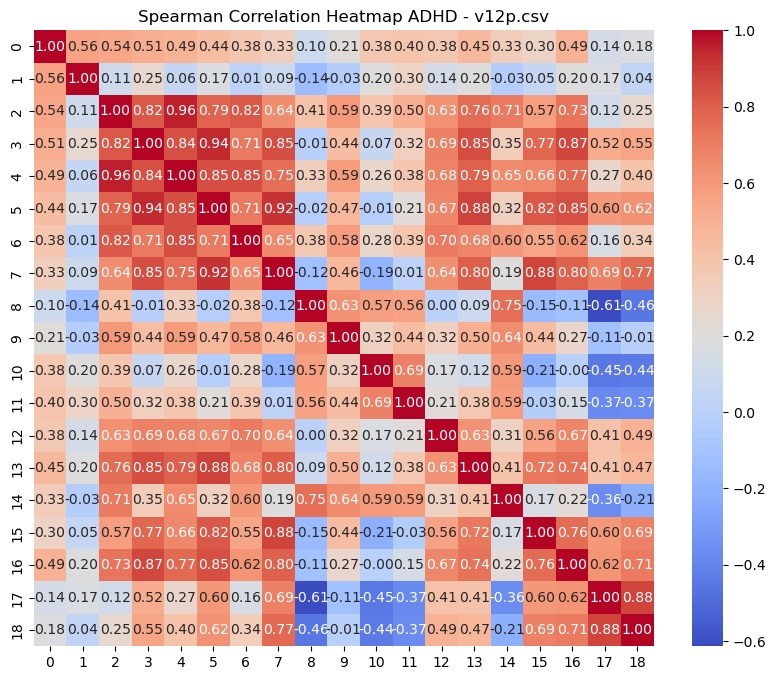

KeyboardInterrupt: 

In [284]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau


def plot_heatmap(correlation_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(title)
    plt.show()

for filename, spearman_corr in spearman_correlations_folder1.items():
    plot_heatmap(spearman_corr, f"Spearman Correlation Heatmap ADHD - {filename}")


for filename, kendall_corr in kendall_correlations_folder1.items():
    plot_heatmap(kendall_corr, f"Kendall Correlation Heatmap ADHD - {filename}")


for filename, spearman_corr in spearman_correlations_folder2.items():
    plot_heatmap(spearman_corr, f"Spearman Correlation Heatmap CONTROL - {filename}")

    
for filename, kendall_corr in kendall_correlations_folder2.items():
    plot_heatmap(kendall_corr, f"Kendall Correlation Heatmap CONTROL- {filename}")


# HEADER UPDATE 

In [206]:
import os
import pandas as pd

header_mapping = {
    '0': 'Fp1',
    '1': 'Fp2',
    '2': 'F3',
    '3': 'F4',
    '4': 'C3',
    '5': 'C4',
    '6': 'P3',
    '7': 'P4',
    '8': 'O1',
    '9': 'O2',
    '10': 'F7',
    '11': 'F8',
    '12': 'T7',
    '13': 'T8',
    '14': 'P7',
    '15': 'P8',
    '16': 'Fz',
    '17': 'Cz',
    '18': 'Pz',
}


def update_csv_headers(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = [header_mapping.get(col, col) for col in df.columns]
    df.to_csv(csv_path, index=False)
    

folder1_path = 'D:/Sem5/ML LAB TEST/CSV/ADHD'
folder2_path = 'D:/Sem5/ML LAB TEST/CSV/Control part'


def add_column_y(csv_path, value):
    df = pd.read_csv(csv_path)
    df['y'] = value
    df.to_csv(csv_path, index=False)


for filename in os.listdir(folder1_path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(folder1_path, filename)
        update_csv_headers(csv_path)
        add_column_y(csv_path, 0) 


for filename in os.listdir(folder2_path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(folder2_path, filename)
        update_csv_headers(csv_path)
        add_column_y(csv_path, 1)  



CSV file headers have been updated, and 'y' column has been added with values.


# HEATMAP FOR A PARTICULAR SUBJECT 

Select a folder:
1: ADHD
2: CONTROL PART
Enter the number of the folder you want to use: 1
Select a CSV file from ADHD:
1: v10p.csv
2: v12p.csv
3: v14p.csv
4: v15p.csv
5: v173.csv
6: v177.csv
7: v179.csv
8: v181.csv
9: v183.csv
10: v18p.csv
11: v190.csv
12: v196.csv
13: v198.csv
14: v19p.csv
15: v1p.csv
16: v200.csv
17: v204.csv
18: v206.csv
19: v209.csv
20: v20p.csv
21: v213.csv
22: v215.csv
23: v219.csv
24: v21p.csv
25: v227.csv
26: v22p(1).csv
27: v22p.csv
28: v231.csv
29: v234.csv
30: v236.csv
31: v238.csv
32: v244.csv
33: v246.csv
34: v24p.csv
35: v250.csv
36: v254.csv
37: v25p.csv
38: v263.csv
39: v265.csv
40: v270.csv
41: v274.csv
42: v279.csv
43: v27p.csv
44: v284.csv
45: v286.csv
46: v288.csv
47: v28p.csv
48: v29p.csv
49: v30p.csv
50: v31p.csv
51: v32p.csv
52: v33p.csv
53: v34p.csv
54: v35p.csv
55: v36p.csv
56: v37p.csv
57: v38p.csv
58: v39p.csv
59: v3p.csv
60: v40p.csv
61: v6p.csv
62: v8p.csv
Enter the number of the CSV file you want to plot: 23


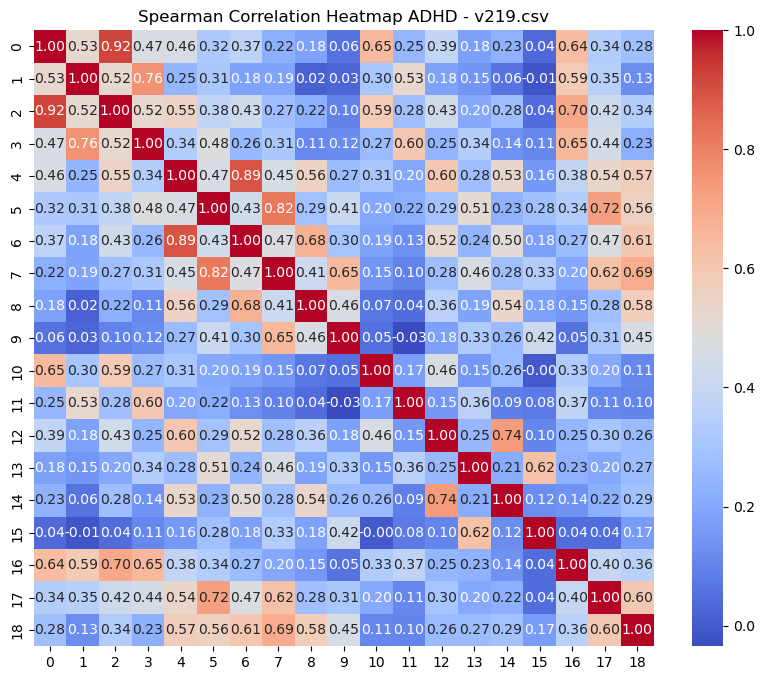

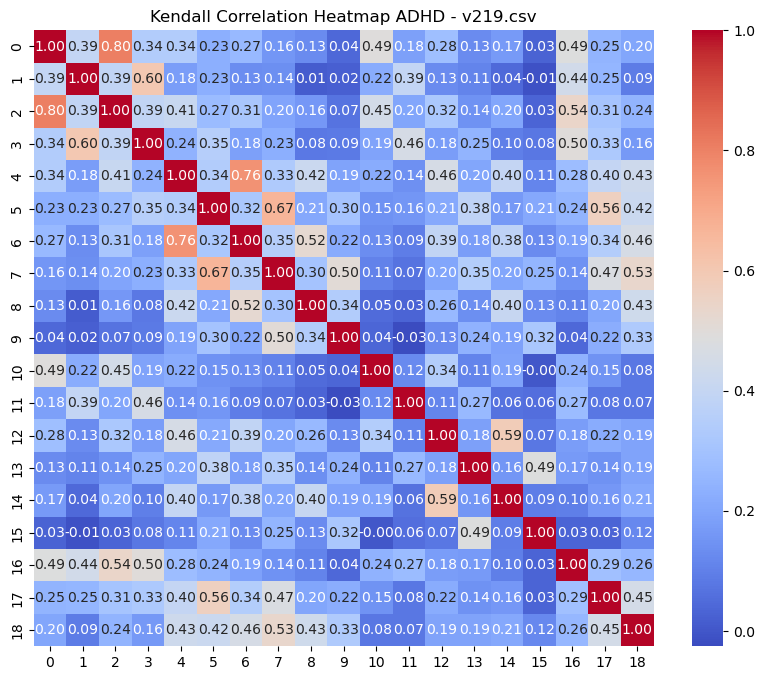

In [285]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau


def plot_heatmap(correlation_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(title)
    plt.show()


def select_folder():
    print("Select a folder:")
    print("1: ADHD")
    print("2: CONTROL PART")

    try:
        folder = int(input("Enter the number of the folder you want to use: "))
        if folder not in [1, 2]:
            print("Invalid folder number. Please enter 1 or 2.")
            return None
        return folder
    except ValueError:
        print("Invalid input. Please enter a number.")
        return None


def select_csv_file(folder):
    folder_name = "ADHD" if folder == 1 else "Control Part"
    folder_path = "D:/Sem5/ML LAB TEST/CSV"
    csv_files = [file for file in os.listdir(os.path.join(folder_path, folder_name)) if file.endswith(".csv")]

    if not csv_files:
        print(f"No CSV files found in {folder_name}.")
        return None

    print(f"Select a CSV file from {folder_name}:")
    for i, file in enumerate(csv_files):
        print(f"{i + 1}: {file}")

    try:
        choice = int(input("Enter the number of the CSV file you want to plot: ")) - 1
        if 0 <= choice < len(csv_files):
            selected_filename = csv_files[choice]
            return selected_filename
        else:
            print("Invalid choice. Please enter a valid number.")
            return None
    except ValueError:
        print("Invalid input. Please enter a number.")
        return None

def plot_correlation_heatmaps(folder, selected_filename):
    folder_name = "ADHD" if folder == 1 else "CONTROL PATH"


    spearman_correlation_matrix = spearman_correlations_folder1.get(selected_filename) if folder == 1 else spearman_correlations_folder2.get(selected_filename)
    if spearman_correlation_matrix is not None:
        spearman_title = f"Spearman Correlation Heatmap {'ADHD' if folder == 1 else 'CONTROL'} - {selected_filename}"
        plot_heatmap(spearman_correlation_matrix, spearman_title)


    kendall_correlation_matrix = kendall_correlations_folder1.get(selected_filename) if folder == 1 else kendall_correlations_folder2.get(selected_filename)
    if kendall_correlation_matrix is not None:
        kendall_title = f"Kendall Correlation Heatmap {'ADHD' if folder == 1 else 'CONTROL'} - {selected_filename}"
        plot_heatmap(kendall_correlation_matrix, kendall_title)


folder = select_folder()  
if folder is not None:
    selected_filename = select_csv_file(folder)
    if selected_filename is not None:
        plot_correlation_heatmaps(folder, selected_filename)

# TOPOPLOT

In [208]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [179]:
pip install eeg_positions

Note: you may need to restart the kernel to use updated packages.


In [209]:
import numpy as np
import pandas as pd
import mne
from eeg_positions import get_elec_coords
import matplotlib.pyplot as plt
from mne import create_info
from mne.viz import plot_topomap
import numpy as np

In [330]:
import os
import pandas as pd


def select_csv_file(folder_name):
    folder_path = "D:/Sem5/ML LAB TEST/CSV"
    csv_files = [file for file in os.listdir(os.path.join(folder_path, folder_name)) if file.endswith(".csv")]

    if not csv_files:
        print(f"No CSV files found in {folder_name}.")
        return None

    while True:
        print(f"Select a CSV file from {folder_name}:")

        for i, file in enumerate(csv_files):
            print(f"{i + 1}: {file}")

        try:
            choice = int(input("Enter the number of the CSV file you want to select (0 to quit): "))
            if choice == 0:
                return None
            elif 0 < choice <= len(csv_files):
                selected_filename = csv_files[choice - 1]
                return selected_filename
            else:
                print("Invalid choice. Please enter a valid number or 0 to quit.")
        except ValueError:
            print("Invalid input. Please enter a number or 0 to quit.")


folder_name = ""

while True:
    try:
        choice = int(input("Select an option:\n1. ADHD\n2. CONTROL PATH\nEnter your choice (1 or 2): "))
        if choice == 1:
            folder_name = "ADHD"
            selected_filename = select_csv_file(folder_name)  # Dynamically select from folder 'ADHD'
            break
        elif choice == 2:
            folder_name = "Control part"  # Set folder_name to empty string for file dialog
            selected_filename = select_csv_file(folder_name)  # Dynamically select from folder 'ADHD'
            break
        else:
            print("Invalid choice. Please enter 1 or 2.")
    except ValueError:
        print("Invalid input. Please enter 1 or 2.")

if selected_filename:
    folder_path = "D:/Sem5/ML LAB TEST/CSV"
    df = pd.read_csv(os.path.join(folder_path, folder_name, selected_filename))
    print(f"CSV file '{selected_filename}' loaded successfully!")
else:
    print("No file selected.")


Select an option:
1. ADHD
2. CONTROL PATH
Enter your choice (1 or 2): 2
Select a CSV file from Control part:
1: v107.csv
2: v108.csv
3: v109.csv
4: v110.csv
5: v111.csv
6: v112.csv
7: v113.csv
8: v114.csv
9: v115.csv
10: v116.csv
11: v117.csv
12: v118.csv
13: v120.csv
14: v121.csv
15: v123.csv
16: v125.csv
17: v127.csv
18: v129.csv
19: v131.csv
20: v133.csv
21: v134.csv
22: v138.csv
23: v140.csv
24: v143.csv
25: v147.csv
26: v149.csv
27: v151.csv
28: v297.csv
29: v298.csv
30: v299.csv
31: v300.csv
32: v302.csv
33: v303.csv
34: v304.csv
35: v305.csv
36: v306.csv
37: v307.csv
38: v308.csv
39: v309.csv
40: v310.csv
41: v41p.csv
42: v42p.csv
43: v43p.csv
44: v44p.csv
45: v45p.csv
46: v46p.csv
47: v47p.csv
48: v48p.csv
49: v49p.csv
50: v50p.csv
51: v51p.csv
52: v52p.csv
53: v53p.csv
54: v54p.csv
55: v55p.csv
56: v56p.csv
57: v57p.csv
58: v58p.csv
59: v59p.csv
60: v60p.csv
Enter the number of the CSV file you want to select (0 to quit): 24
CSV file 'v143.csv' loaded successfully!


In [331]:
df.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz,y
0,-0.039545,-0.187330,-0.044173,0.416119,-0.277780,-0.210320,-0.159829,2.264571,-0.044717,1.658506,-0.280033,-0.561069,-0.287686,-0.214019,0.456625,0.658293,-0.155212,0.397616,-0.642285,1
1,-0.156970,-0.753836,-0.044173,-0.972535,-0.042842,-0.843634,0.302444,-0.509035,0.203219,-0.510017,0.077946,-0.561069,0.078892,-0.700599,0.456625,-0.408732,-0.039133,-0.791324,-0.239760,1
2,-0.956109,-0.753836,-1.022906,-0.818728,-0.392074,-0.370817,-0.043474,1.338639,-0.292652,1.346912,-0.870217,-0.727868,-0.647660,-0.700599,-0.541738,0.305837,-1.174129,-0.495147,-0.239760,1
3,0.302943,0.099970,0.079422,-0.203502,0.306390,0.110675,0.302444,0.412707,0.447804,0.416342,0.432701,0.120027,0.442168,-0.214019,0.582698,-0.051448,0.299431,0.101439,0.470408,1
4,-1.644347,-0.470583,-1.517283,-0.203502,-0.858775,0.427332,-1.776210,0.412707,-1.766863,0.727936,-1.579726,0.120027,-1.377514,0.442194,-1.420843,-0.051448,-1.854481,0.846113,-0.843547,1


In [332]:
info = df.columns.values[:-1]
data_min = df.min(axis=0)[:-1]

In [333]:
coords = get_elec_coords(system="1020",dim="2d").set_index("label")
coords['xy']=coords.apply(lambda x : (x.x,x.y),axis=1)
coords['xy']

label
Cz                                      (0.0, 0.0)
Fpz                       (0.0, 0.726585179526356)
Fz                        (0.0, 0.324930901050304)
Pz                       (0.0, -0.324930901050304)
Oz                       (0.0, -0.726585179526356)
T7                       (-0.726585179526356, 0.0)
C3                       (-0.324930901050304, 0.0)
C4                        (0.324930901050304, 0.0)
T8                        (0.726585179526356, 0.0)
Fp2       (0.2245225362872422, 0.6909854851031322)
F8       (0.5878533231474408, 0.42704354469060357)
P8      (0.5878533231474408, -0.42704354469060357)
O2       (0.2245225362872422, -0.6909854851031322)
Fp1      (-0.2245225362872422, 0.6909854851031322)
F7      (-0.5878533231474408, 0.42704354469060357)
P7     (-0.5878533231474408, -0.42704354469060357)
O1      (-0.2245225362872422, -0.6909854851031322)
F3        (-0.2744172145845786, 0.346682606096832)
F4         (0.2744172145845786, 0.346682606096832)
P3       (-0.274417214584

In [334]:
pos_arr = [coords['xy'][x] for x in info]
print(len(pos_arr))

19


In [335]:
pos_array=np.array(pos_arr)

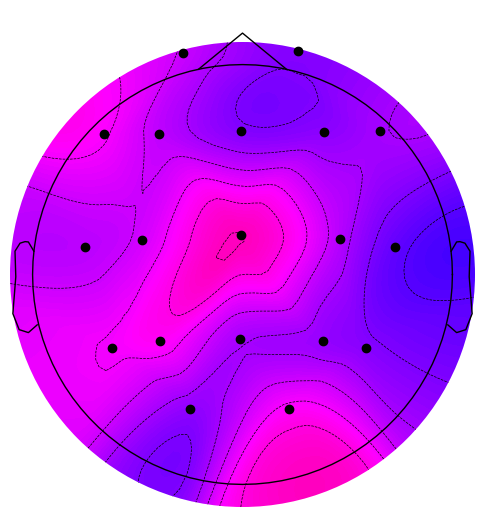

In [336]:
column=['Fz','Cz','Pz','C3','T3','C4','T4','Fp1','Fp2','F3','F4','F7','F8','P3','P4','T5','T6','O1','O2']


info = create_info(ch_names=column, sfreq=1000, ch_types='eeg')
info.set_montage('standard_1020')
data = data_min.to_numpy()
fig, ax = plt.subplots(figsize=(6, 6))
plot_topomap(data, info,axes=ax,cmap='gist_rainbow_r',sensors='ko')
plt.show()

# MEDIAN 

In [293]:
import pandas as pd
import numpy as np
import os

directory_path = "D:/Sem5/ML LAB TEST/CSV"


median_values_adhd = []
median_values_control = []

for dir_name in os.listdir(directory_path):
    dir_path = os.path.join(directory_path, dir_name) 
    if os.path.isdir(dir_path):
        is_adhd_group = "ADHD" in dir_name

        
        for filename in os.listdir(dir_path):
            if filename.endswith(".csv"):
                file_path = os.path.join(dir_path, filename)
                try:
                    df = pd.read_csv(file_path)
                    df = df.iloc[:, :19]

                    
                    if is_adhd_group:
                        median_values_adhd.append(df.median(axis=0))
                    else:
                        median_values_control.append(df.median(axis=0))

                    
                    print(f"Median values (excluding columns 19 and beyond) for {filename} in group {dir_name}:\n{df.median(axis=0)}")
                except FileNotFoundError:
                    print(f"File {filename} not found.")
                except Exception as e:
                    print(f"An error occurred for {filename} in group {dir_name}: {str(e)}")

adhd_matrix = np.array(median_values_adhd)
control_matrix = np.array(median_values_control)


Median values (excluding columns 19 and beyond) for v10p.csv in group ADHD:
Fp1    0.043885
Fp2    0.046539
F3     0.062047
F4     0.064961
C3     0.059776
C4     0.069000
P3     0.061221
P4     0.065337
O1     0.084182
O2     0.096574
F7     0.059870
F8     0.083260
T7     0.085975
T8     0.076067
P7     0.093685
P8     0.094937
Fz     0.068051
Cz     0.070087
Pz     0.068477
dtype: float64
Median values (excluding columns 19 and beyond) for v12p.csv in group ADHD:
Fp1    0.030472
Fp2    0.036450
F3     0.023697
F4     0.027895
C3     0.023015
C4     0.030118
P3     0.017972
P4     0.031237
O1     0.031455
O2     0.048427
F7     0.040710
F8     0.044866
T7     0.026300
T8     0.054638
P7     0.042849
P8     0.036502
Fz     0.026966
Cz     0.025815
Pz     0.020017
dtype: float64
Median values (excluding columns 19 and beyond) for v14p.csv in group ADHD:
Fp1   -0.054718
Fp2    0.018884
F3     0.040653
F4    -0.079279
C3     0.034330
C4     0.036285
P3     0.032757
P4     0.036129
O1    

In [294]:
adhd_matrix = np.array(median_values_adhd)
control_matrix = np.array(median_values_control)


In [295]:
print(adhd_matrix)

[[ 0.04388454  0.04653878  0.0620473  ...  0.06805084  0.07008676
   0.06847672]
 [ 0.03047168  0.03644999  0.02369747 ...  0.02696558  0.02581501
   0.02001652]
 [-0.05471824  0.01888357  0.04065284 ...  0.0346555   0.02620831
   0.02533903]
 ...
 [-0.06887369 -0.12653742 -0.0781084  ...  0.04981074 -0.13694236
  -0.07285863]
 [ 0.02188511  0.02169492  0.05624541 ...  0.05685545  0.05881405
   0.04666448]
 [-0.06079216 -0.06406936 -0.08060734 ... -0.07598884  0.13334702
  -0.09531484]]


In [296]:
print(control_matrix)

[[-0.04388145  0.05641008 -0.04548225 ...  0.06772072 -0.04464662
  -0.03435263]
 [-0.05137793 -0.05130694 -0.05761793 ... -0.0436546  -0.0469125
  -0.04767087]
 [-0.02911687 -0.03862305 -0.03065463 ... -0.02944629 -0.03717185
  -0.0251177 ]
 ...
 [-0.06188055 -0.06492705 -0.11824381 ... -0.12875933  0.09913139
  -0.10035743]
 [ 0.03523343  0.04103527  0.11916887 ...  0.10124313  0.10014757
   0.11890724]
 [ 0.09546221  0.07369289  0.05889795 ... -0.00902117 -0.01944409
  -0.01008687]]


In [297]:
adhd_shape = adhd_matrix.shape
control_shape = control_matrix.shape

print("Dimensions of ADHD Matrix:", adhd_shape)
print("Dimensions of Control Matrix:", control_shape)

Dimensions of ADHD Matrix: (62, 19)
Dimensions of Control Matrix: (60, 19)


# SIMILARITY MATRIX AND LAPLACIAN MATRIX

In [298]:
import numpy as np
from scipy.linalg import eigh
from sklearn.metrics.pairwise import euclidean_distances

adhd_matrix = np.array(median_values_adhd)
control_matrix = np.array(median_values_control)

bandwidth = 1.0  


pairwise_distances_adhd = euclidean_distances(adhd_matrix)
similarity_matrix_adhd = np.exp(- (pairwise_distances_adhd ** 2) / (2 * bandwidth ** 2))

pairwise_distances_control = euclidean_distances(control_matrix)
similarity_matrix_control = np.exp(- (pairwise_distances_control ** 2) / (2 * bandwidth ** 2))


def laplacian_matrix(similarity_matrix):
    # Calculate the degree matrix
    degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
    
    # Calculate the Laplacian matrix
    laplacian = degree_matrix - similarity_matrix
    
    return laplacian

laplacian_adhd = laplacian_matrix(similarity_matrix_adhd)
laplacian_control = laplacian_matrix(similarity_matrix_control)


In [299]:
print(laplacian_adhd)

[[50.22616665 -0.98413811 -0.9597553  ... -0.75938838 -0.96309007
  -0.77599275]
 [-0.98413811 53.46461288 -0.98233676 ... -0.8330518  -0.97546151
  -0.85121342]
 [-0.9597553  -0.98233676 53.64787231 ... -0.86323617 -0.95070349
  -0.87087824]
 ...
 [-0.75938838 -0.8330518  -0.86323617 ... 51.2661726  -0.80461424
  -0.88420802]
 [-0.96309007 -0.97546151 -0.95070349 ... -0.80461424 52.01595011
  -0.80997166]
 [-0.77599275 -0.85121342 -0.87087824 ... -0.88420802 -0.80997166
  52.68335424]]


# SPECTRAL CLUSTERING

In [300]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

laplacian_adhd = laplacian_matrix(similarity_matrix_adhd)
laplacian_control = laplacian_matrix(similarity_matrix_control)

num_clusters = 2

eigenvalues_adhd, eigenvectors_adhd = eigh(laplacian_adhd)
eigenvalues_control, eigenvectors_control = eigh(laplacian_control)

smallest_eigenvalues_adhd = eigenvalues_adhd[:num_clusters]
smallest_eigenvectors_adhd = eigenvectors_adhd[:, :num_clusters]

smallest_eigenvalues_control = eigenvalues_control[:num_clusters]
smallest_eigenvectors_control = eigenvectors_control[:, :num_clusters]


embedding_adhd = PCA(n_components=num_clusters).fit_transform(smallest_eigenvectors_adhd)
embedding_control = PCA(n_components=num_clusters).fit_transform(smallest_eigenvectors_control)


cluster_labels_adhd = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors').fit_predict(embedding_adhd)
cluster_labels_control = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors').fit_predict(embedding_control)


In [301]:
print(len(cluster_labels_adhd))

62


In [302]:
print(len(cluster_labels_control))

60


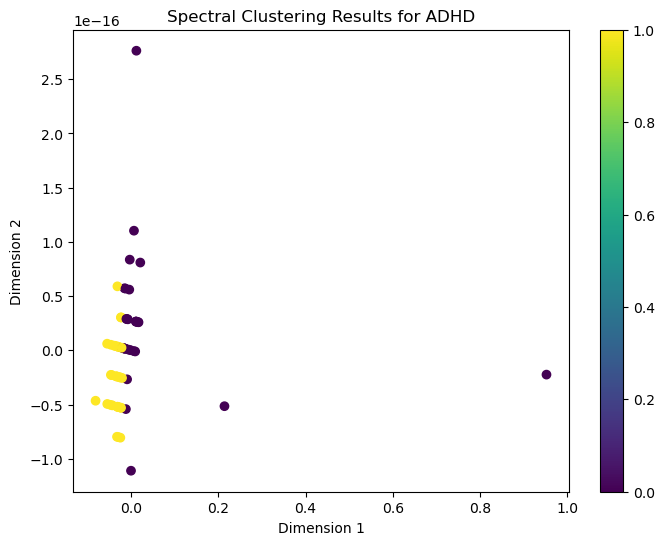

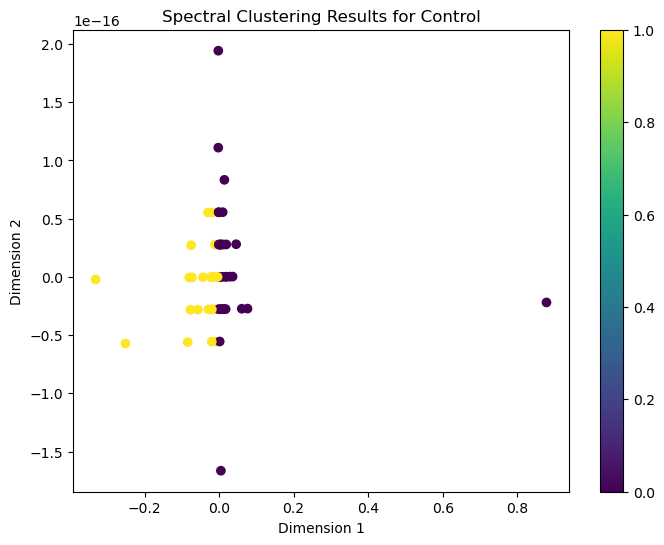

In [303]:
import matplotlib.pyplot as plt

# Scatter plot for ADHD data
plt.figure(figsize=(8, 6))
plt.scatter(embedding_adhd[:, 0], embedding_adhd[:, 1], c=cluster_labels_adhd, cmap='viridis')
plt.title('Spectral Clustering Results for ADHD')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()

# Scatter plot for control data
plt.figure(figsize=(8, 6))
plt.scatter(embedding_control[:, 0], embedding_control[:, 1], c=cluster_labels_control, cmap='viridis')
plt.title('Spectral Clustering Results for Control')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar()
plt.show()


# RANK

In [304]:
import numpy as np

# Calculate the rank of the median matrix

adhd_rank = np.linalg.matrix_rank(adhd_matrix)
control_rank = np.linalg.matrix_rank(control_matrix)

# Print the rank
print(f"The rank of the median matrix is: {adhd_rank}")
print(f"The rank of the median matrix is: {control_rank}")

The rank of the median matrix is: 19
The rank of the median matrix is: 19


If the result of calculating the rank of your 121x19 median matrix is 19, it means that all 19 columns in your matrix are linearly independent. In other words, there are no linear dependencies or redundancies among these columns.

Having a rank equal to the number of columns (19 in this case) implies that each column provides unique and essential information

# MODEL BUILDING

In [305]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [306]:
labels_adhd = [0] * len(adhd_matrix)
labels_control = [1] * len(control_matrix)

# Combine the labels into a single target array 'y'
y = np.concatenate((labels_adhd, labels_control))
print(y)
# Perform feature selection using SelectKBest
num_features_to_select = 10
selector = SelectKBest(f_classif, k=num_features_to_select)
median_matrix_selected = selector.fit_transform(np.concatenate((adhd_matrix, control_matrix)), y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [307]:
print(median_matrix_selected)

[[ 0.04388454  0.04653878  0.0620473  ...  0.08418216  0.0832601
   0.09368539]
 [ 0.03047168  0.03644999  0.02369747 ...  0.03145473  0.04486639
   0.04284878]
 [-0.05471824  0.01888357  0.04065284 ...  0.04422    -0.07713858
   0.03820271]
 ...
 [-0.06188055 -0.06492705 -0.11824381 ...  0.08904866 -0.16229302
  -0.13028151]
 [ 0.03523343  0.04103527  0.11916887 ...  0.13785742  0.0795338
   0.14649054]
 [ 0.09546221  0.07369289  0.05889795 ...  0.05002816  0.0868015
   0.06131533]]


In [308]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(median_matrix_selected, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0)  # You can choose different kernel functions and C values based on your data and problem.

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.44      0.80      0.57        10

    accuracy                           0.52        25
   macro avg       0.58      0.57      0.51        25
weighted avg       0.61      0.52      0.50        25

